In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
# ---- Load your dataset ----
iris_df = pd.read_csv("Iris.csv")

# Features and target
X = iris_df.drop(['Id', 'Species'], axis=1)
y = iris_df['Species']

# Create DataFrame for EDA (with renamed columns + mapped labels)
df = iris_df.copy()
df['species'] = df['Species'].map({
    'Iris-setosa': 'setosa',
    'Iris-versicolor': 'versicolor',
    'Iris-virginica': 'virginica'
})
df = df.drop('Species', axis=1)
df = df.rename(columns={
    'SepalLengthCm': 'sepal length (cm)',
    'SepalWidthCm': 'sepal width (cm)',
    'PetalLengthCm': 'petal length (cm)',
    'PetalWidthCm': 'petal width (cm)'
})

print(df.head())

   Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0   1                5.1               3.5                1.4   
1   2                4.9               3.0                1.4   
2   3                4.7               3.2                1.3   
3   4                4.6               3.1                1.5   
4   5                5.0               3.6                1.4   

   petal width (cm) species  
0               0.2  setosa  
1               0.2  setosa  
2               0.2  setosa  
3               0.2  setosa  
4               0.2  setosa  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 150 non-null    int64  
 1   sepal length (cm)  150 non-null    float64
 2   sepal width (cm)   150 non-null    float64
 3   petal length (cm)  150 non-null    float64
 4   petal width (cm)   150 non-null    float64
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
count  150.000000         150.000000        150.000000         150.000000   
mean    75.500000           5.843333          3.054000           3.758667   
std     43.445368           0.828066          0.433594           1.764420   
min      1.000000           4.300000          2.000000           1.000000   
25%     38.250000           5.100000          2.800000      

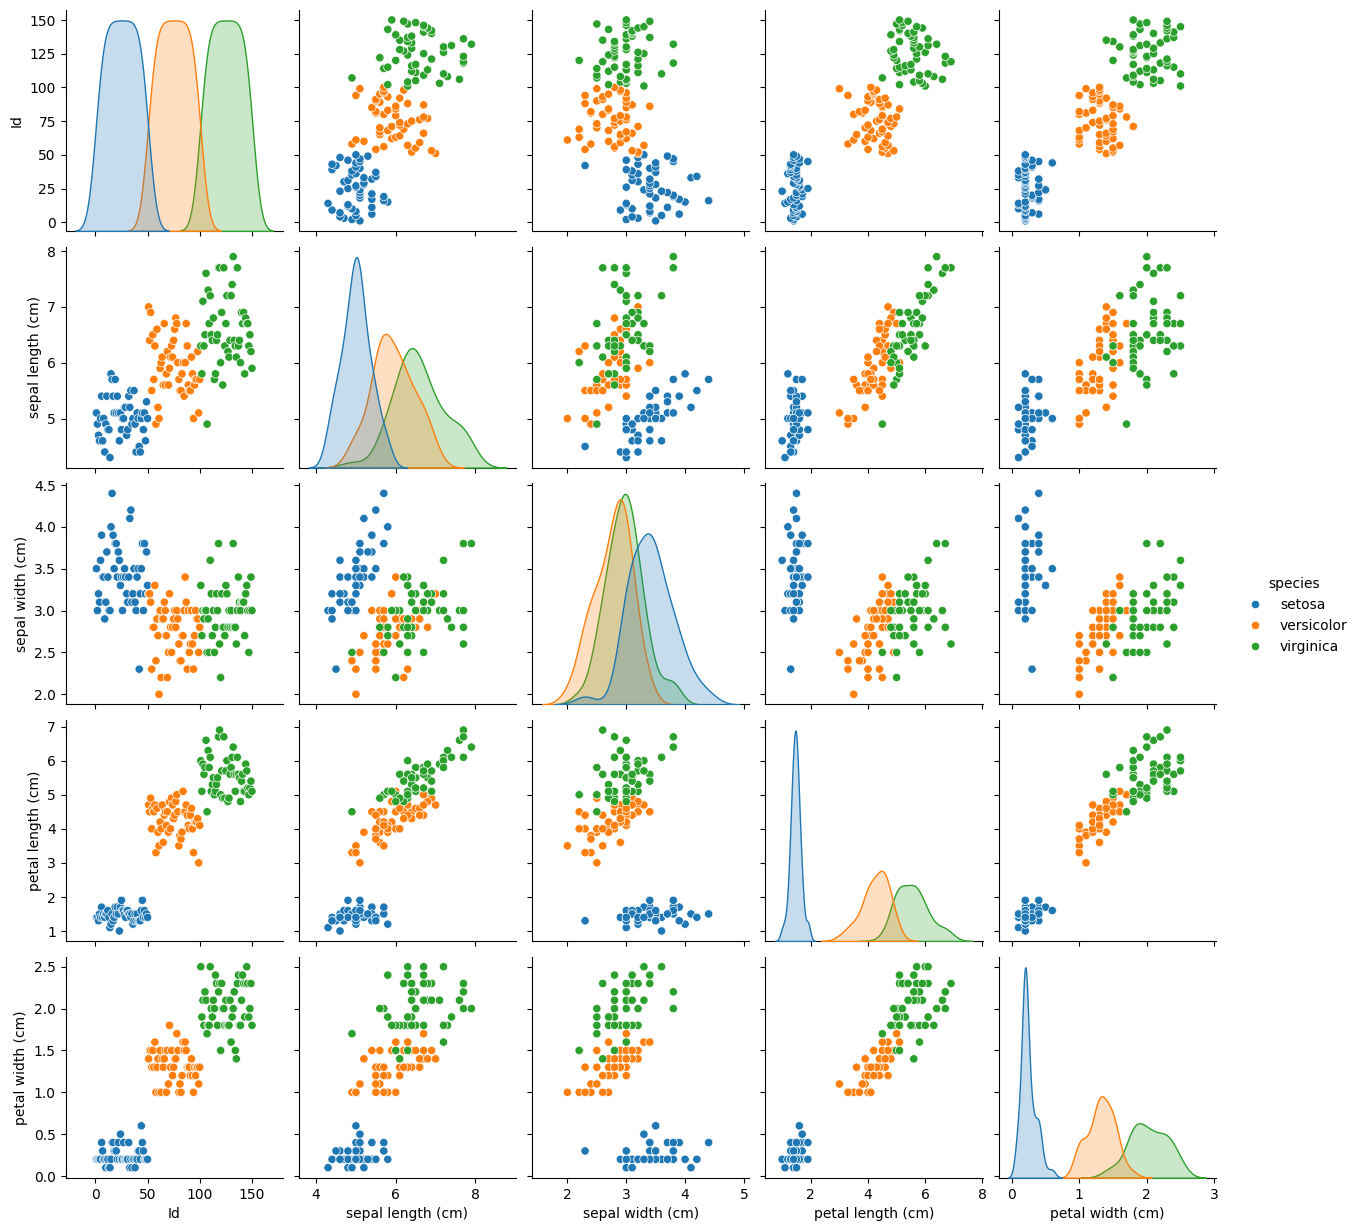

In [19]:
#EDA
print(df.info())
print(df.describe())
print(df['species'].value_counts())

# Pairplot visualization
sns.pairplot(df, hue="species", diag_kind="kde")
plt.show()


In [20]:
#Data Preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
#KNN Clasiification model Training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


Accuracy: 0.9333333333333333

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



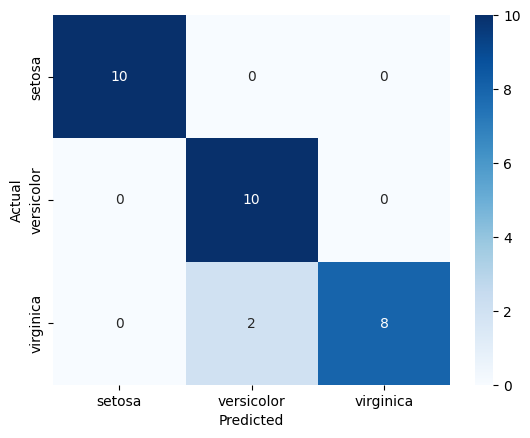

In [22]:
#Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


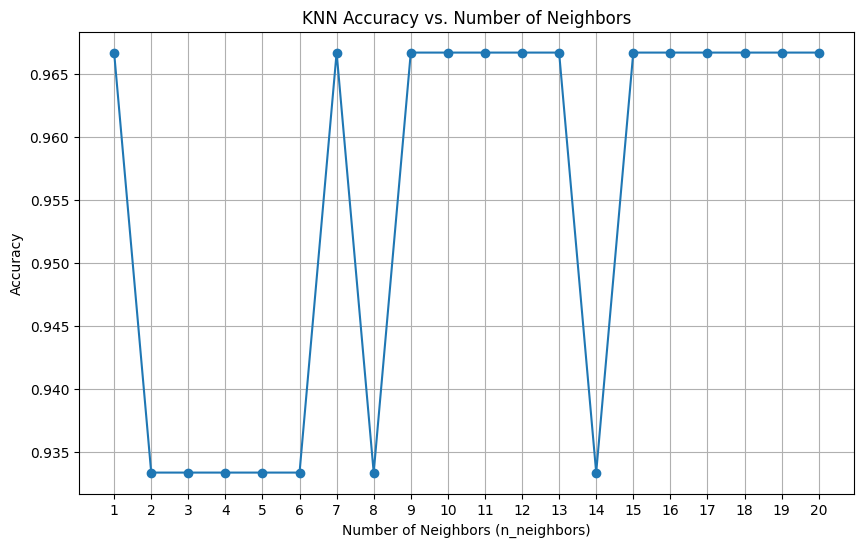

The optimal number of neighbors is: 1


In [24]:
# ---- Find optimal n_neighbors ----
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracy_scores = []
neighbors_range = range(1, 21)  # Test n_neighbors from 1 to 20

for n in neighbors_range:
    knn_tuned = KNeighborsClassifier(n_neighbors=n)
    knn_tuned.fit(X_train, y_train)
    y_pred_tuned = knn_tuned.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_tuned)
    accuracy_scores.append(accuracy)

# ---- Plot accuracy vs n_neighbors ----
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, accuracy_scores, marker='o', linestyle='-')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.xticks(neighbors_range)
plt.grid(True)
plt.show()

# ---- Find the best n_neighbors ----
optimal_n = neighbors_range[accuracy_scores.index(max(accuracy_scores))]
print(f"The optimal number of neighbors is: {optimal_n}")
